<a href="https://colab.research.google.com/github/VictorBris/IAE_METZ_DATA_2025_5/blob/main/Projet_Data_5_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analyse et Evaluation de performance d'actions

# Industrie de la mode et du luxe
LVMH

HERMES

KERING

# Etape 1 : Importation des Packages

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
from datetime import datetime, timedelta
import seaborn as sns
from scipy.optimize import minimize

In [ ]:
# Période définie.
start_date = "2020-01-01"
end_date = "2025-01-01"

Nombre total de jours : 1283


# Etape 2 : Téléchargement des données

In [ ]:
# Choix de 3 entreprises dans l'industrie de la mode et du luxe et de l'indice boursier + on les nomme.
tickers = ['MC.PA', 'RMS.PA', 'KER.PA']
tickers1 =['MC.PA', 'RMS.PA', 'KER.PA', '^FCHI']
names = ['LVMH', 'HERMES', 'KERING']
names1 = ['LVMH', 'HERMES', 'KERING','CAC40']

In [ ]:
# On télécharge les données correspondant au portefeuille d'actions.
df = yf.download(tickers, start=start_date, end=end_date, auto_adjust=False)['Close']
df = df[tickers]
df.columns = names
print(df)

[*********************100%***********************]  3 of 3 completed

                  LVMH       HERMES      KERING
Date                                           
2020-01-02  419.149994   671.000000  598.000000
2020-01-03  419.100006   675.400024  600.900024
2020-01-06  415.149994   669.799988  590.799988
2020-01-07  416.000000   678.200012  596.299988
2020-01-08  418.799988   684.200012  597.299988
...                ...          ...         ...
2024-12-23  629.200012  2302.000000  235.600006
2024-12-24  630.799988  2298.000000  234.199997
2024-12-27  635.599976  2314.000000  237.949997
2024-12-30  629.299988  2305.000000  237.100006
2024-12-31  635.500000  2322.000000  238.250000

[1283 rows x 3 columns]


In [ ]:
# Téléchargement des données, cette fois-ci avec l'indice boursier CAC40.
df1 = yf.download(tickers1, start=start_date, end=end_date, auto_adjust=False)['Close']
df1 = df1[tickers1]
df1.columns = names1
print(df1)

[*********************100%***********************]  4 of 4 completed

                  LVMH       HERMES      KERING        CAC40
Date                                                        
2020-01-02  419.149994   671.000000  598.000000  6041.500000
2020-01-03  419.100006   675.400024  600.900024  6044.160156
2020-01-06  415.149994   669.799988  590.799988  6013.589844
2020-01-07  416.000000   678.200012  596.299988  6012.350098
2020-01-08  418.799988   684.200012  597.299988  6031.000000
...                ...          ...         ...          ...
2024-12-23  629.200012  2302.000000  235.600006  7272.319824
2024-12-24  630.799988  2298.000000  234.199997  7282.689941
2024-12-27  635.599976  2314.000000  237.949997  7355.370117
2024-12-30  629.299988  2305.000000  237.100006  7313.560059
2024-12-31  635.500000  2322.000000  238.250000  7380.740234

[1283 rows x 4 columns]


# Etape 3 : Nettoyage et Prétraitement des Données

In [ ]:
# On identifie s'il y existe des données manquantes pour ne pas fausser les analyses.
print(df.isnull().sum())
print(df1.isnull().sum())

LVMH      0
HERMES    0
KERING    0
dtype: int64
LVMH      0
HERMES    0
KERING    0
CAC40     0
dtype: int64


In [ ]:
premiere_ligne = df.dropna().index[0]
df = df.loc[premiere_ligne:]
print(df)

                  LVMH       HERMES      KERING
Date                                           
2020-01-02  419.149994   671.000000  598.000000
2020-01-03  419.100006   675.400024  600.900024
2020-01-06  415.149994   669.799988  590.799988
2020-01-07  416.000000   678.200012  596.299988
2020-01-08  418.799988   684.200012  597.299988
...                ...          ...         ...
2024-12-23  629.200012  2302.000000  235.600006
2024-12-24  630.799988  2298.000000  234.199997
2024-12-27  635.599976  2314.000000  237.949997
2024-12-30  629.299988  2305.000000  237.100006
2024-12-31  635.500000  2322.000000  238.250000

[1283 rows x 3 columns]


In [ ]:
print(f"Nombre total : {len(df)} jours")

Nombre total : 1283 jours


# Etape 4 : Analyse exploratoire des actions prises et de l'indice boursier

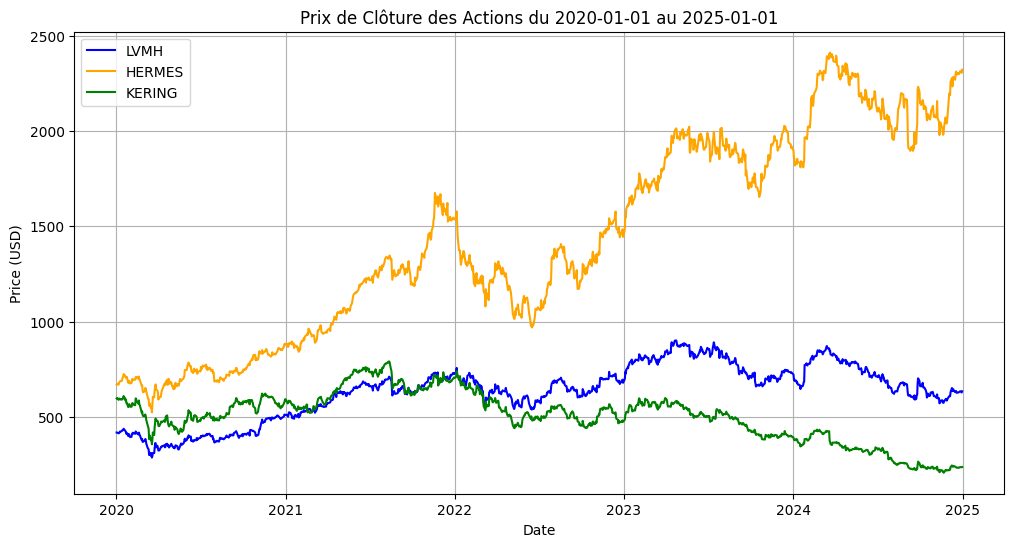

In [ ]:
# Graphique des prix de clôture des actions depuis ces 5 dernières années.
plt.figure(figsize=(12,6))
plt.plot(df['LVMH'], label='LVMH', color='blue')
plt.plot(df['HERMES'], label='HERMES', color='orange')
plt.plot(df['KERING'], label='KERING', color='green')
plt.title(f'Prix de Clôture des Actions du {start_date} au {end_date}')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Calcul des rendements quotidiens des actions du portefeuille.
rendements_quotidiens = df.pct_change().dropna()
print(rendements_quotidiens)

                LVMH    HERMES    KERING
Date                                    
2020-01-03 -0.000119  0.006557  0.004850
2020-01-06 -0.009425 -0.008291 -0.016808
2020-01-07  0.002047  0.012541  0.009309
2020-01-08  0.006731  0.008847  0.001677
2020-01-09  0.013610  0.004092 -0.002344
...              ...       ...       ...
2024-12-23  0.001751 -0.000868  0.005978
2024-12-24  0.002543 -0.001738 -0.005942
2024-12-27  0.007609  0.006963  0.016012
2024-12-30 -0.009912 -0.003889 -0.003572
2024-12-31  0.009852  0.007375  0.004850

[1282 rows x 3 columns]


In [ ]:
# Calcul des rendements quotidiens du CAC40.
rendements_quotidiens1 = df1.pct_change().dropna()
print(rendements_quotidiens1['CAC40'])

Date
2020-01-03    0.000440
2020-01-06   -0.005058
2020-01-07   -0.000206
2020-01-08    0.003102
2020-01-09    0.001915
                ...   
2024-12-23   -0.000297
2024-12-24    0.001426
2024-12-27    0.009980
2024-12-30   -0.005684
2024-12-31    0.009186
Name: CAC40, Length: 1282, dtype: float64


In [ ]:
# Calcul des rendements mensuels.
rendements_mensuels = rendements_quotidiens.resample('M').apply(lambda x: (1 + x).prod() - 1)
print(rendements_mensuels)

                LVMH    HERMES    KERING
Date                                    
2020-01-31 -0.056901  0.008346 -0.071906
2020-02-29 -0.061852 -0.068874 -0.088649
2020-03-31 -0.087367 -0.001905 -0.059114
2020-04-30  0.041365  0.062023 -0.032990
2020-05-31  0.063981  0.119796  0.020426
2020-06-30  0.041333 -0.005349  0.031197
2020-07-31 -0.060819 -0.077440 -0.005163
2020-08-31  0.071029  0.048382  0.068189
2020-09-30  0.016802  0.023353  0.102993
2020-10-31  0.007261  0.085303 -0.086505
2020-11-30  0.200348  0.023029  0.166827
2020-12-31  0.057983  0.076095 -0.017521
2021-01-31 -0.024662 -0.042065 -0.088829
2021-02-28  0.053582  0.095656 -0.030834
2021-03-31  0.082095  0.022530  0.121356
2021-04-30  0.102271  0.105932  0.132348
2021-05-31  0.041201  0.103927  0.122731
2021-06-30  0.014264  0.065944 -0.015101
2021-07-31  0.019053  0.049247  0.026052
2021-08-31 -0.069892 -0.034523 -0.108701
2021-09-30 -0.010689 -0.038570 -0.086053
2021-10-31  0.092082  0.145424  0.052273
2021-11-30  0.01

<ipython-input-38-4aa980e16d17>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  rendements_mensuels = rendements_quotidiens.resample('M').apply(lambda x: (1 + x).prod() - 1)


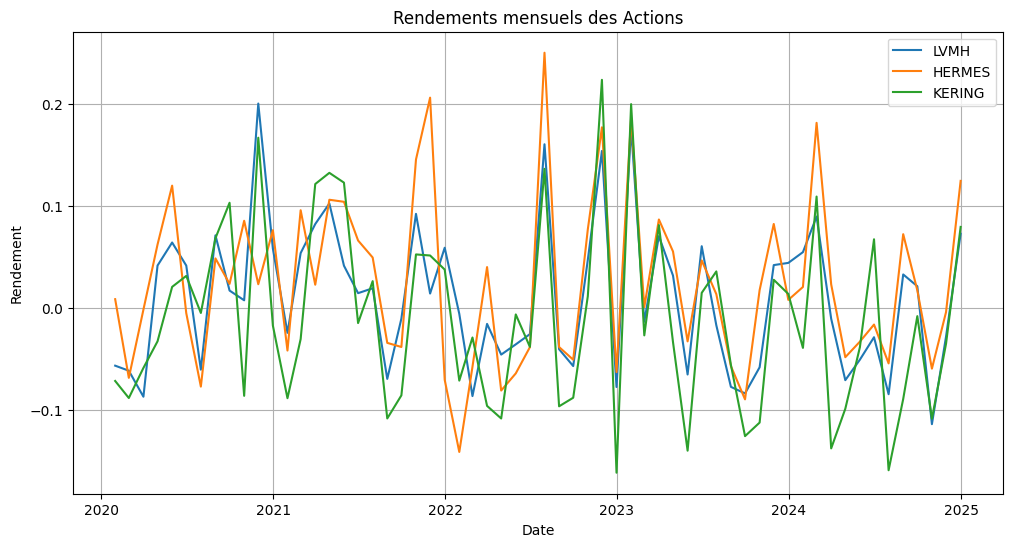

In [ ]:
# Graphique qui illustre les rendements mensuels des actions.
plt.figure(figsize=(12, 6))

# Traçage des rendements mensuels pour chaque action.
for colonne in rendements_mensuels.columns:
    plt.plot(rendements_mensuels.index, rendements_mensuels[colonne], label=colonne)

plt.title('Rendements mensuels des Actions')
plt.xlabel('Date')
plt.ylabel('Rendement')
plt.legend(loc='best')
plt.grid(True)

plt.show()

In [ ]:
# Calcul des rendements trimestriels.
rendements_trimestriels = rendements_quotidiens.resample('Q').apply(lambda x: (1 + x).prod() - 1)
print(rendements_trimestriels)

                LVMH    HERMES    KERING
Date                                    
2020-03-31 -0.192532 -0.062891 -0.204181
2020-06-30  0.153789  0.182888  0.017546
2020-09-30  0.022791 -0.010218  0.172122
2020-12-31  0.279169  0.194784  0.047216
2021-03-31  0.111959  0.073215 -0.009758
2021-06-30  0.164056  0.301377  0.252124
2021-09-30 -0.062302 -0.026048 -0.164179
2021-12-31  0.172392  0.283744  0.147565
2022-03-31 -0.106740 -0.159180 -0.185599
2022-06-30 -0.104250 -0.173829 -0.148689
2022-09-30  0.049338  0.140581 -0.064375
2022-12-31  0.113860  0.187346  0.036964
2023-03-31  0.241947  0.289965  0.261830
2023-06-30  0.022027  0.067597 -0.157333
2023-09-30 -0.169873 -0.130754 -0.145767
2023-12-31  0.024009  0.109261 -0.076175
2024-03-31  0.136450  0.233062 -0.081830
2024-06-30 -0.144057 -0.095520 -0.076020
2024-09-30 -0.035174  0.030841 -0.241211
2024-12-31 -0.076979  0.052584 -0.072416


<ipython-input-39-bb85a4d699c6>:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  rendements_trimestriels = rendements_quotidiens.resample('Q').apply(lambda x: (1 + x).prod() - 1)


In [ ]:
# Et puis calcul du rendement annuel des actions.
rendements_annuels = rendements_quotidiens.mean() * 252
print(rendements_annuels)

LVMH      0.126415
HERMES    0.283989
KERING   -0.124538
dtype: float64


In [ ]:
# Calcul du rendement annuel du CAC40.
rendements_annuels1 = rendements_quotidiens1.mean() * 252
print(rendements_annuels1['CAC40'])

0.06042029898486581


Text(0, 0.5, 'Performance (%)')

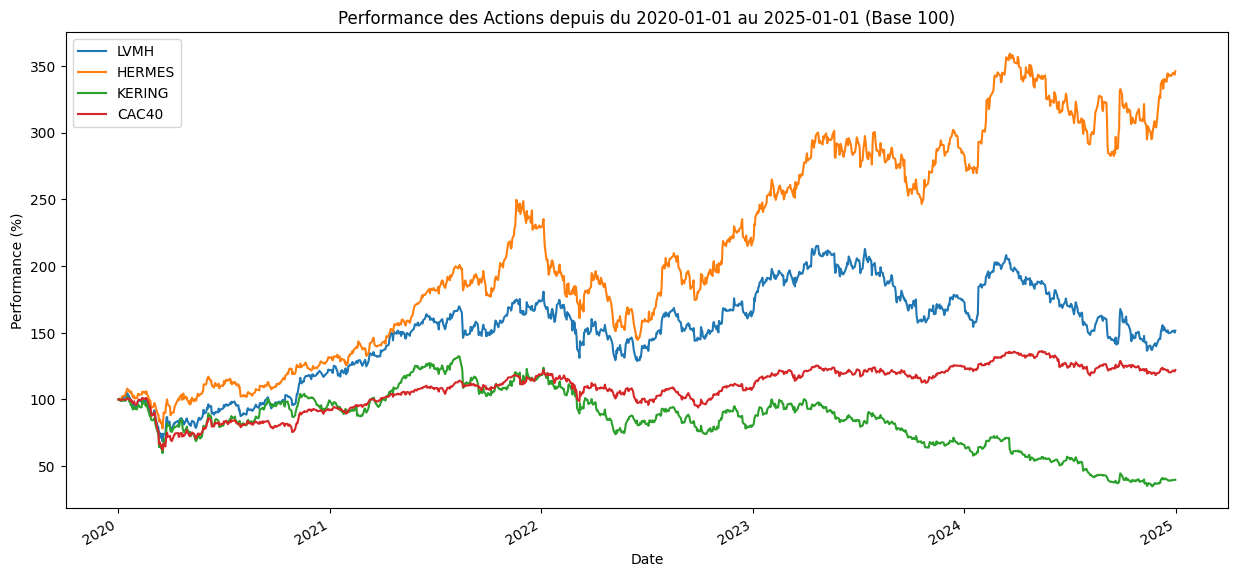

In [ ]:
# Graphique des performances des actions et du CAC40.
(df1 / df1.iloc[0] * 100).plot(figsize=(15, 7))
plt.title(f'Performance des Actions depuis du {start_date} au {end_date} (Base 100)')
plt.xlabel('Date')
plt.ylabel('Performance (%)')

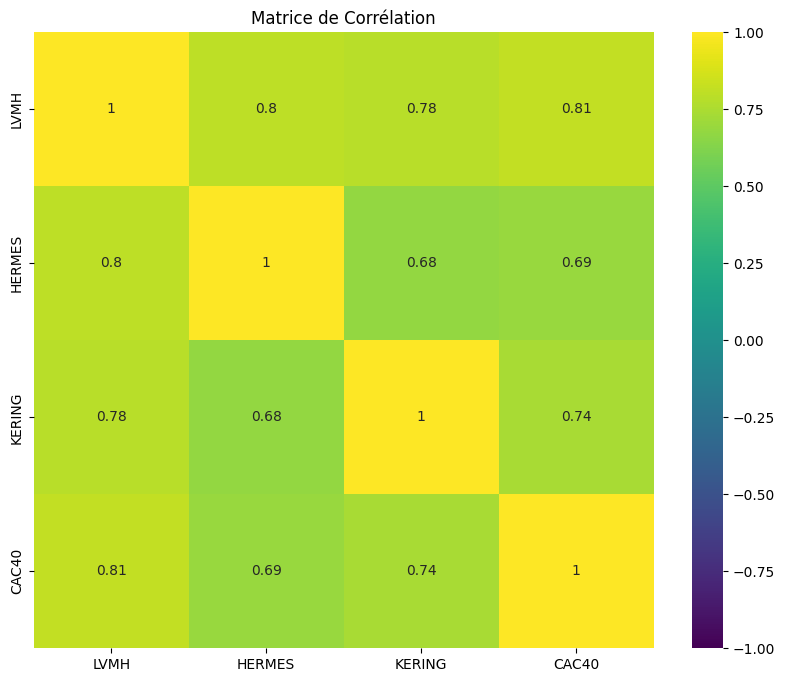

In [ ]:
# Matrice de corrélation
plt.figure(figsize=(10, 8))
matrice_correlation = rendements_quotiens1.corr()
sns.heatmap(matrice_correlation, annot=True, cmap='viridis', vmin=-1, vmax=1)
plt.title('Matrice de Corrélation')
plt.show()

In [ ]:
# Calcul de la matrice de covariance.
matrice_covariance = rendements_quotidiens.cov() * 252
matrice_covariance1 = rendements_quotidiens1.cov() * 252
print(matrice_covariance)
print(matrice_covariance1)

            LVMH    HERMES    KERING
LVMH    0.089635  0.068070  0.078573
HERMES  0.068070  0.079946  0.064068
KERING  0.078573  0.064068  0.112294
            LVMH    HERMES    KERING     CAC40
LVMH    0.089635  0.068070  0.078573  0.049814
HERMES  0.068070  0.079946  0.064068  0.039990
KERING  0.078573  0.064068  0.112294  0.050633
CAC40   0.049814  0.039990  0.050633  0.041850


In [ ]:
risk_free_rate = 0.02 # Même taux sans risque utilisé dans le cours.

In [ ]:
# Création d'un dictionnaire.
# Nous avons décider de construire ce dictionnaireUne afin qu'il nous donne immédiatement un tableau bien structuré prêt pour l'analyse ou la visualisation.
# Les calculs complexes (comme le bêta, l'alpha, le ratio de Sharpe) sont effectués une seule fois et leurs résultats sont stockés, évitant ainsi de répéter les calculs.
resultats = {}
for ticker in names:
    beta = rendements_quotidiens[ticker].cov(rendements_quotidiens.mean(axis=1)) / rendements_quotidiens.mean(axis=1).var()

    resultats[ticker] = {
        "Rendement Annualisé": rendements_annuels[ticker],
        "Risque (Volatilité)": np.sqrt(matrice_covariance.loc[ticker, ticker]),
        "Ratio de Sharpe": (rendements_annuels[ticker] - risk_free_rate) / np.sqrt(matrice_covariance.loc[ticker, ticker]),
        "Beta": beta,
        "Alpha": rendements_annuels[ticker] - (risk_free_rate + beta * (rendements_annuels1['CAC40'] - risk_free_rate))
       }

df_resultats = pd.DataFrame(resultats).T

# Puis on affiche le tableau.
print(df_resultats)

        Rendement Annualisé  Risque (Volatilité)  Ratio de Sharpe      Beta  \
LVMH               0.126415             0.299391         0.355439  1.007874   
HERMES             0.283989             0.282748         0.933656  0.904670   
KERING            -0.124538             0.335103        -0.431325  1.087455   

           Alpha  
LVMH    0.065677  
HERMES  0.227422  
KERING -0.188493  


# Etape 5 : Création du portefeuille avec équipondération

In [ ]:
# Poids équipondéré pour chaque action.
poid_portefeuille = np.array([0.33, 0.33, 0.33])

In [ ]:
# On établit une fonction pour calculer les rendements et risques du portefeuille.
def portfolio_performance(weights, returns, cov_matrix):
    rendements_portefeuille = np.sum(returns * weights)
    risque_portefeuille = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return rendements_portefeuille, risque_portefeuille

In [ ]:
rendements_portefeuille, risque_portefeuille = portfolio_performance(poid_portefeuille, rendements_annuels, matrice_covariance)

In [ ]:
print(rendements_portefeuille)
print(risque_porterfeuille)

0.09433597797998217
0.27674726314759845


# Etape 6 : Quelques ratios de performances et comparaison du portefeuille avec l'indice boursier

## calcul du ratio de sharpe du portefeuille

In [ ]:
sharpe_portefeuille = (rendements_portefeuille - risk_free_rate) / risque_portefeuille
print(sharpe_portefeuille)

0.26860600944890406


## calcul du ratio de treynor du portefeuille

In [ ]:
treynor_portefeuille = (rendements_portefeuille - risk_free_rate) / beta
print(treynor_portefeuille)

0.06835772224821673


In [ ]:
# Calcul du rendement cumulatif pour mesurer la performance sur 5 ans.
rendements_cumulatifs = (1 + rendements_quotidiens).cumprod()
rendements_cumulatifs1 = (1 + rendements_quotiens1).cumprod()
rendements_totaux = (df.iloc[-1] / df.iloc[0] - 1) * 100
rendements_totaux1 = (df1.iloc[-1] / df1.iloc[0] - 1) * 100
print(rendements_totaux)
print(rendements_totaux1['CAC40'])


LVMH       51.616369
HERMES    246.050671
KERING    -60.158863
dtype: float64
22.167346426797984


In [ ]:
# Création d'une série de rendements du portefeuille
rendements_quotidiens_portefeuille = rendements_quotidiens[names].dot(poid_portefeuille)
print(rendements_quotidiens_portefeuille)

Date
2020-01-03    0.003725
2020-01-06   -0.011393
2020-01-07    0.007886
2020-01-08    0.005694
2020-01-09    0.005068
                ...   
2024-12-23    0.002264
2024-12-24   -0.001695
2024-12-27    0.010093
2024-12-30   -0.005733
2024-12-31    0.007286
Length: 1282, dtype: float64


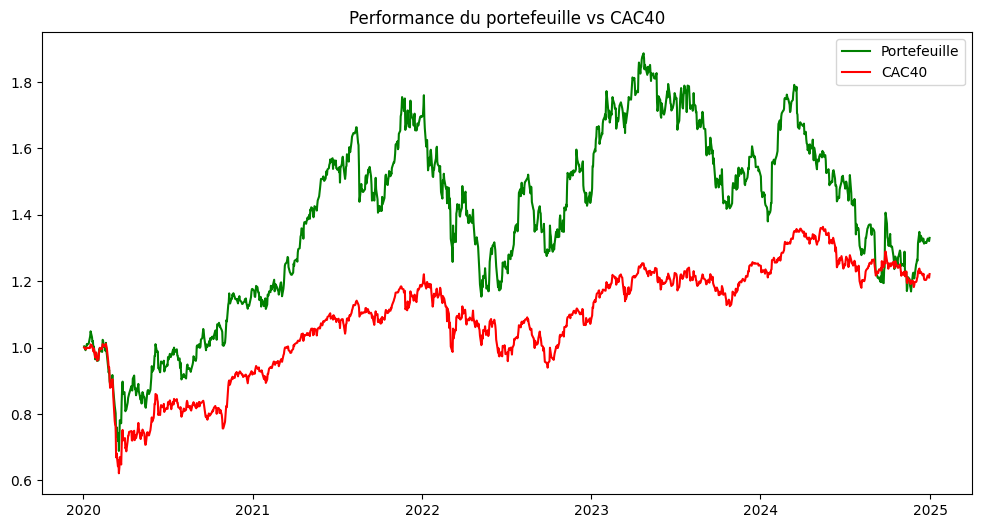

In [ ]:
# Graphique de l'évolution base 100 du portefeuille avec le benchmark CAC 40
valeur_portefeuille = (1 + rendements_quotidiens.dot(poid_portefeuille)).cumprod()
valeur_portefeuille1 = (1 + rendements_quotidiens1['CAC40']).cumprod()

plt.figure(figsize=(12, 6))
plt.plot(valeur_portefeuille, label='Portefeuille', color='green')
plt.plot(valeur_portefeuille1, label='CAC40', color='red')
plt.title('Performance du portefeuille vs CAC40')
plt.legend()
plt.show()